In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  
  
import warnings  
warnings.filterwarnings('ignore')  
  
plt.style.use('ggplot')  

# reading dataset

In [3]:
dataframe = pd.read_csv('insurance_claims.csv')  

In [4]:
dataframe.head()  

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
# some missing values are denoted by '0', so let's replace missing values with np.nan  
  
dataframe.replace('0', np.nan, inplace = True)  
dataframe.describe()  

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,0.0
mean,202.773869,38.663317,523864.924623,1175.879397,1252.828945,1.301508e+06,504226.824121,26709.045226,-25756.281407,11.708543,1.839196,1.030151,1.396985,53459.547739,7768.391960,7532.914573,38158.241206,2005.733668,NaN
std,112.167687,8.933662,262606.552517,616.868194,224.384484,2.496371e+06,73046.706312,28382.230865,27667.834007,6.725158,1.002155,0.815937,1.090913,28828.522410,5403.210739,5210.383431,20296.608823,5.915604,NaN
min,8.000000,23.000000,104594.000000,500.000000,538.170000,0.000000e+00,430104.000000,0.000000,-91200.000000,0.000000,1.000000,0.000000,0.000000,2400.000000,0.000000,0.000000,1680.000000,1995.000000,NaN
25%,119.000000,32.000000,305591.000000,500.000000,1104.040000,0.000000e+00,449637.500000,0.000000,-50650.000000,6.000000,1.000000,0.000000,0.000000,38920.000000,2510.000000,3730.000000,28710.000000,2001.000000,NaN
50%,200.000000,38.000000,514065.000000,1000.000000,1266.920000,0.000000e+00,468176.000000,27000.000000,-20800.000000,12.000000,1.000000,1.000000,1.000000,60170.000000,7310.000000,6860.000000,42560.000000,2006.000000,NaN
75%,270.500000,43.500000,724031.000000,2000.000000,1398.885000,0.000000e+00,603454.000000,51700.000000,0.000000,17.000000,3.000000,2.000000,2.000000,72930.000000,12100.000000,11330.000000,51505.000000,2011.000000,NaN
max,478.000000,64.000000,992145.000000,2000.000000,1922.840000,1.000000e+07,620757.000000,94800.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,21580.000000,79560.000000,2015.000000,NaN


In [6]:
dataframe.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           199 non-null    int64  
 1   age                          199 non-null    int64  
 2   policy_number                199 non-null    int64  
 3   policy_bind_date             199 non-null    object 
 4   policy_state                 199 non-null    object 
 5   policy_csl                   199 non-null    object 
 6   policy_deductable            199 non-null    int64  
 7   policy_annual_premium        199 non-null    float64
 8   umbrella_limit               199 non-null    int64  
 9   insured_zip                  199 non-null    int64  
 10  insured_sex                  199 non-null    object 
 11  insured_education_level      199 non-null    object 
 12  insured_occupation           199 non-null    object 
 13  insured_hobbies     

In [7]:
# looking for missing values  
dataframe.isna().sum()  

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

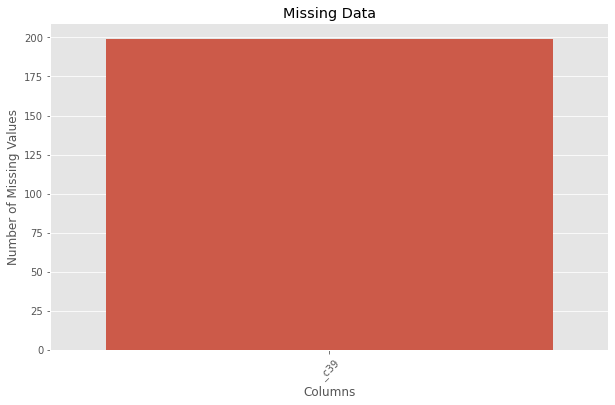

In [8]:
import seaborn as sns
import pandas as pd

# Assuming dataframe is your DataFrame
missing_data = dataframe.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter out columns with no missing data

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Missing Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


In [9]:
dataframe['collision_type'] = dataframe['collision_type'].fillna(dataframe['collision_type'].mode()[0])  
dataframe['property_damage'] = dataframe['property_damage'].fillna(dataframe['property_damage'].mode()[0])  
dataframe['police_report_available'] = dataframe['police_report_available'].fillna(dataframe['police_report_available'].mode()[0])  
  
dataframe.isna().sum()  

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

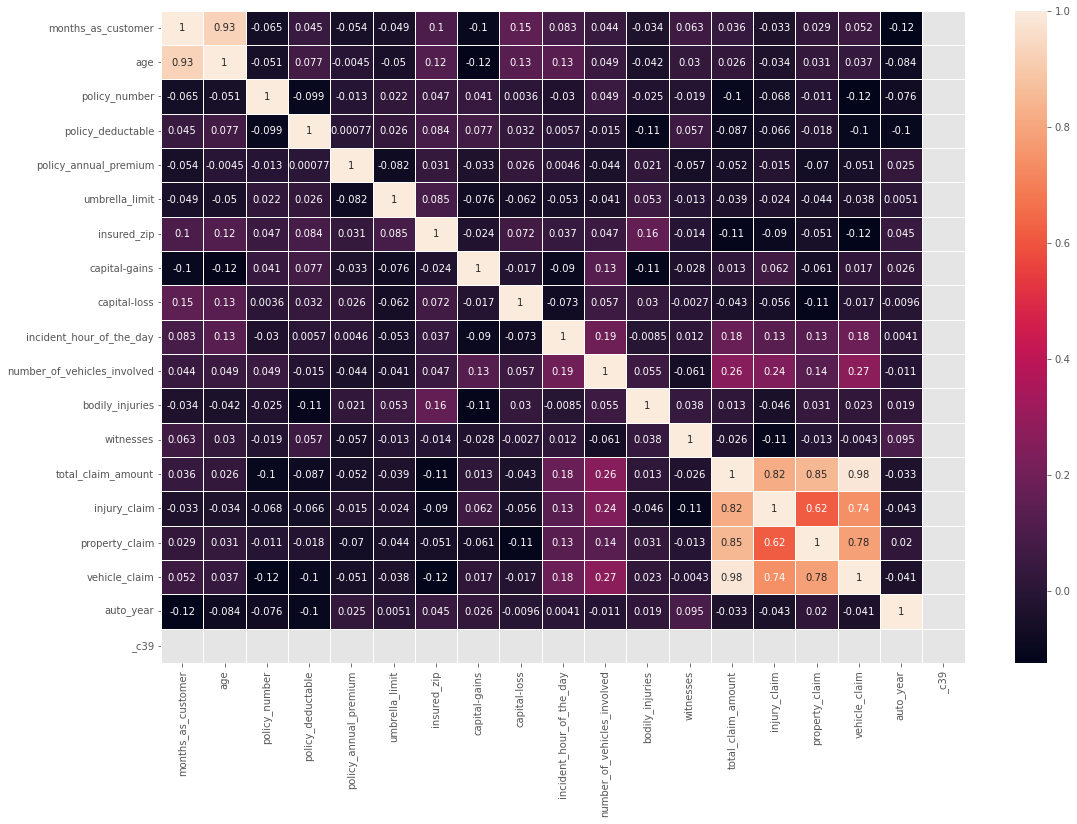

In [10]:
# heatmap  
  
plt.figure(figsize = (18, 12))  
  
corr = dataframe.corr()  
  
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)  
plt.show()  

In [11]:
dataframe.nunique()  

months_as_customer             153
age                             38
policy_number                  199
policy_bind_date               197
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          198
umbrella_limit                   9
insured_zip                    199
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                   97
capital-loss                    96
incident_date                   57
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_location              199
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries     

In [12]:
# dropping columns that are not necessary for prediction  
  
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']  
  
dataframe.drop(to_drop, inplace = True, axis = 1)  
dataframe.head()  

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


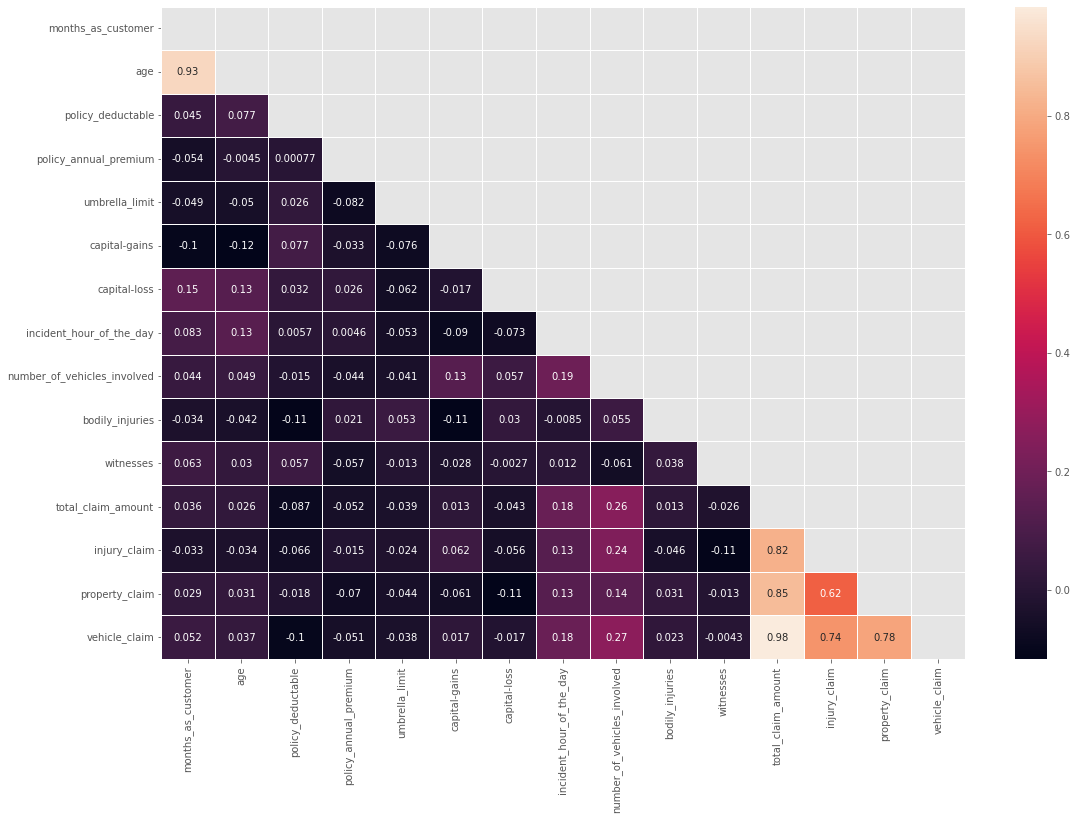

In [14]:
# checking for multicollinearity  
  
plt.figure(figsize = (18, 12))  
  
corr = dataframe.corr()  
mask = np.triu(np.ones_like(corr, dtype = bool))  
  
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)  
plt.show()  

In [15]:
dataframe.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)  
dataframe.head()  

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [16]:
dataframe.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           199 non-null    int64  
 1   policy_csl                   199 non-null    object 
 2   policy_deductable            199 non-null    int64  
 3   policy_annual_premium        199 non-null    float64
 4   umbrella_limit               199 non-null    int64  
 5   insured_sex                  199 non-null    object 
 6   insured_education_level      199 non-null    object 
 7   insured_occupation           199 non-null    object 
 8   insured_relationship         199 non-null    object 
 9   capital-gains                199 non-null    int64  
 10  capital-loss                 199 non-null    int64  
 11  incident_type                199 non-null    object 
 12  collision_type               199 non-null    object 
 13  incident_severity   

In [17]:
# separating the feature and target columns  
  
X = dataframe.drop('fraud_reported', axis = 1)  
y = dataframe['fraud_reported']  


# encoding catogorical variable

In [18]:
# extracting categorical columns  
dataframe_cat = X.select_dtypes(include = ['object'])  
dataframe_cat.head()  

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO


In [19]:
dataframe_cat = pd.get_dummies(dataframe_cat, drop_first = True)  
dataframe_cat.head()  

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
# extracting the numerical columns  
  
dataframe_num = X.select_dtypes(include = ['int64'])  
dataframe_num.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [21]:
# combining the Numerical and Categorical dataframes to get the final dataset  
  
X = pd.concat([dataframe_num, dataframe_cat], axis = 1)  
X.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,0,0,0,1,0,1,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,0,1,0,0,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,0,1,1,0,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,1,0,0,1,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,1,0,0,1,0,1,0


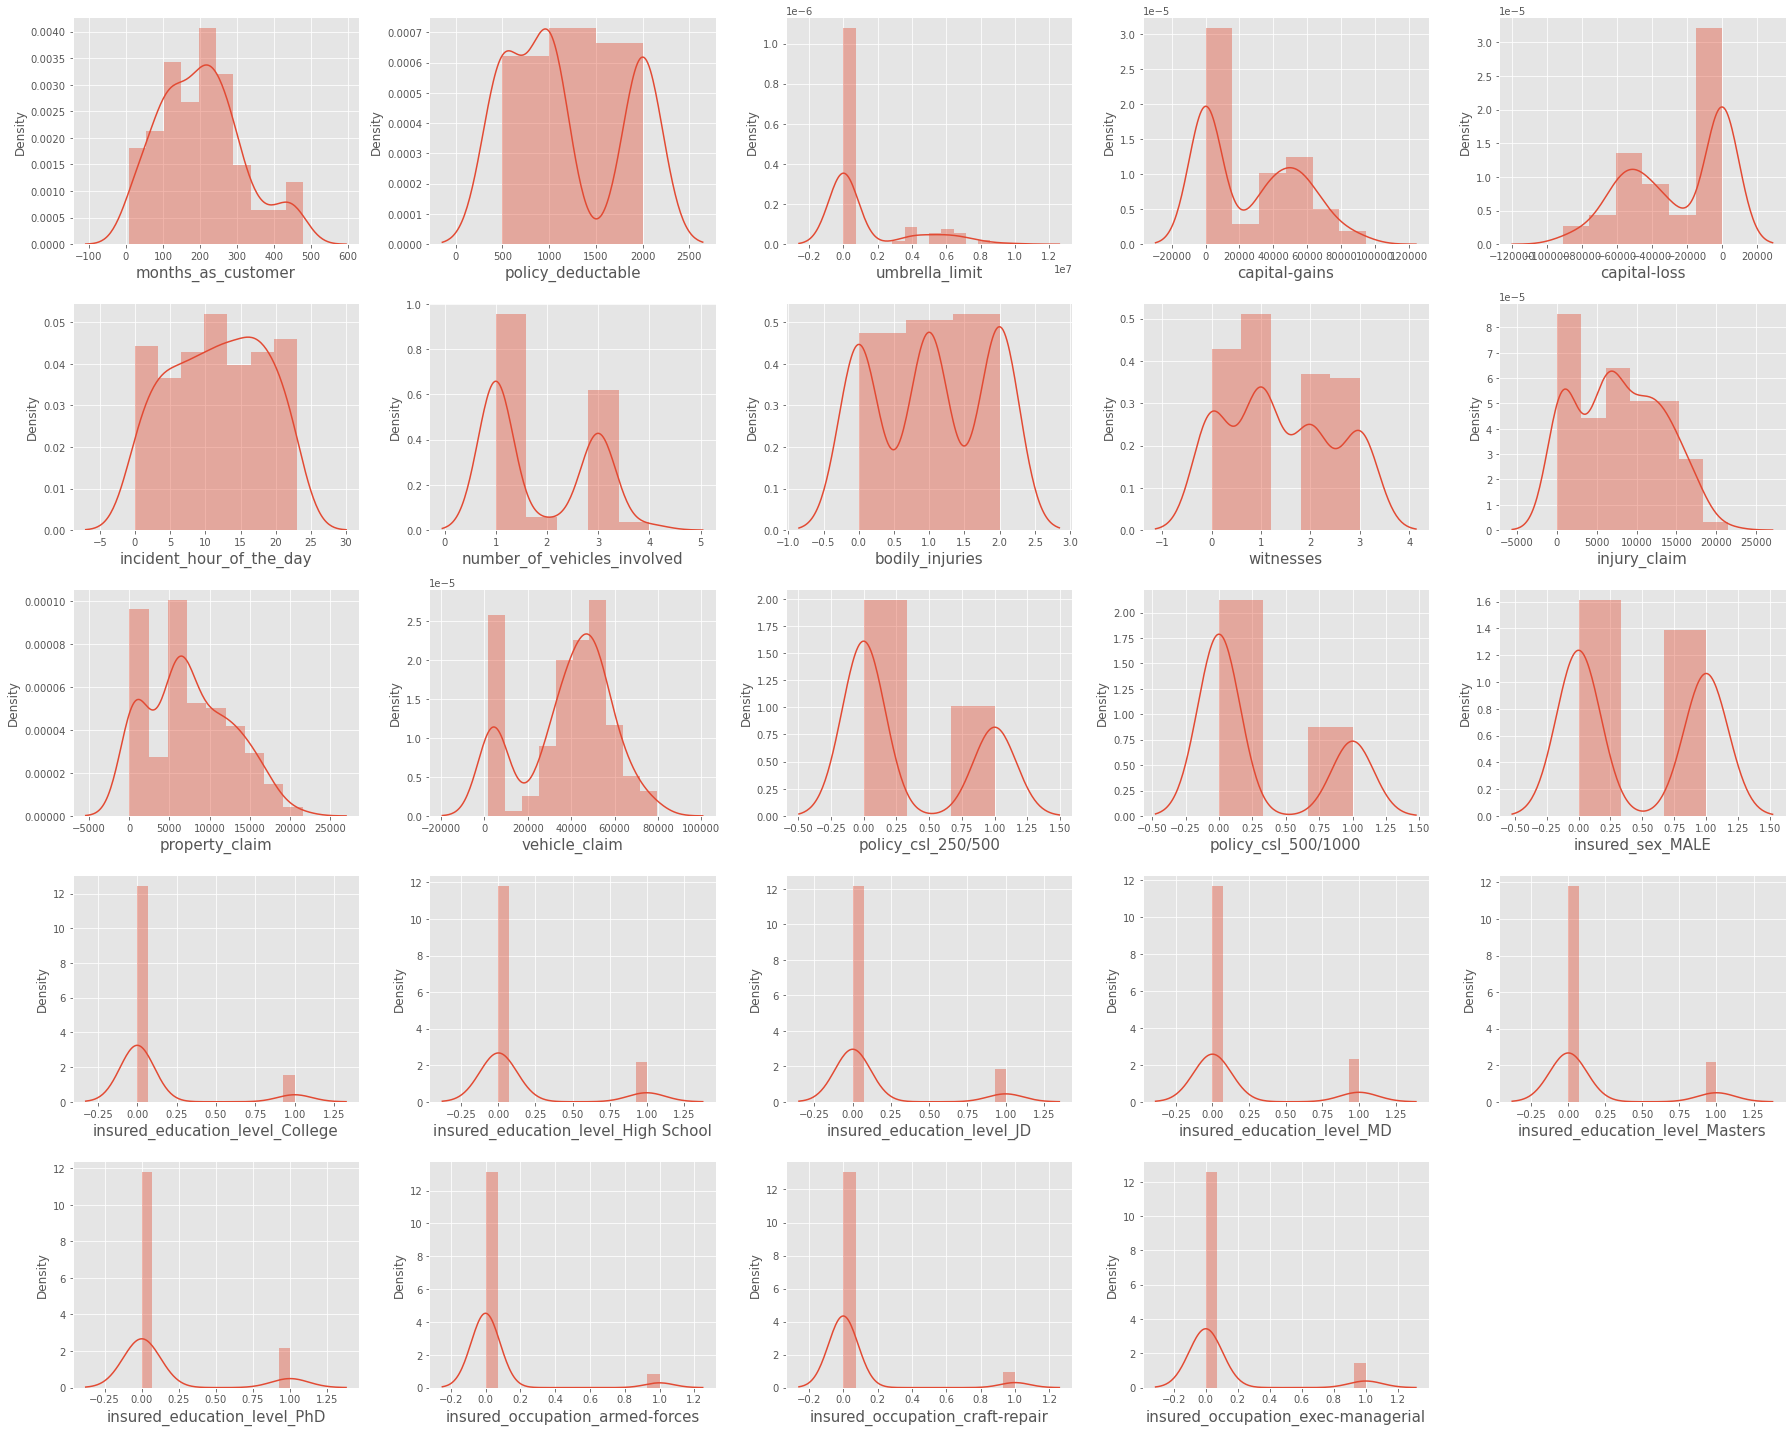

In [23]:
plt.figure(figsize = (25, 20))  
plotnumber = 1  
  
for col in X.columns:  
    if plotnumber <= 24:  
        ax = plt.subplot(5, 5, plotnumber)  
        sns.distplot(X[col])  
        plt.xlabel(col, fontsize = 15)  
         
    plotnumber += 1  
     
plt.tight_layout()  
plt.show()  

# outliers detection

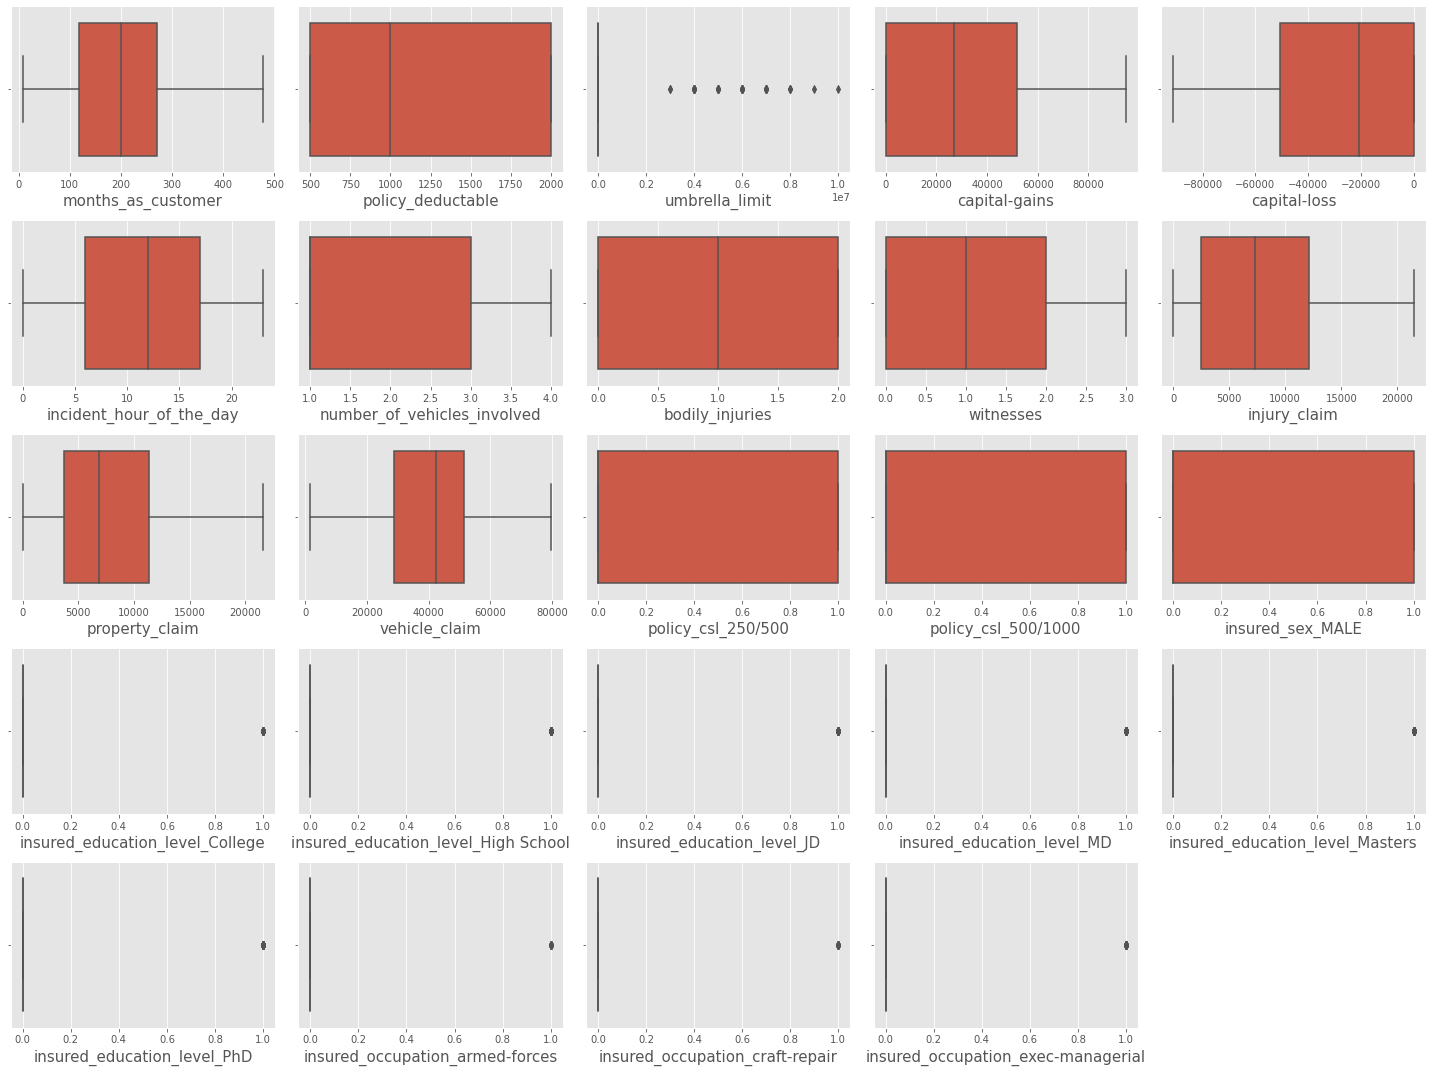

In [24]:
plt.figure(figsize = (20, 15))  
plotnumber = 1  
  
for col in X.columns:  
    if plotnumber <= 24:  
        ax = plt.subplot(5, 5, plotnumber)  
        sns.boxplot(X[col])  
        plt.xlabel(col, fontsize = 15)  
     
    plotnumber += 1  
plt.tight_layout()  
plt.show()  

In [25]:
# splitting data into a training set and test set  
  
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
X_train.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
154,101,1000,7000000,52000,-44500,20,3,1,3,9040,...,0,0,0,0,0,0,1,0,0,0
42,37,500,0,0,-67400,17,3,1,0,5740,...,0,0,0,0,1,0,0,1,1,0
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,0,0,0,1,0,1,0,1
13,121,1000,0,52800,-32800,5,1,1,1,1120,...,0,0,0,1,0,0,1,0,1,0
24,237,1000,0,0,-53500,6,1,1,3,7080,...,0,0,0,0,1,0,1,0,1,0


In [26]:
dataframe_num= X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',  
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',  
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',  
       'vehicle_claim']]  
# Scaling the numeric values in the dataset  
  
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  
scaled_data = scaler.fit_transform(dataframe_num)  
scaled_dataframe_num = pd.DataFrame(data = scaled_data, columns = dataframe_num.columns, index = X_train.index)  
scaled_dataframe_num.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
154,-0.977726,-0.291314,2.599318,0.911474,-0.616385,1.300220,1.117713,0.0,1.469863,0.247185,0.281525,-0.108663
42,-1.549130,-1.110292,-0.484969,-0.969094,-1.430999,0.837851,1.117713,0.0,-1.350003,-0.354294,-0.348513,0.086887
0,1.048972,-0.291314,-0.484969,0.958488,0.966597,-1.011627,-0.876769,0.0,0.529908,-0.213949,1.041388,0.665756
13,-0.799163,-0.291314,-0.484969,0.940405,-0.200186,-1.011627,-0.876769,0.0,-0.410048,-1.196366,-1.230566,-1.622477
24,0.236507,-0.291314,-0.484969,-0.969094,-0.936539,-0.857504,-0.876769,0.0,1.469863,-0.110057,1.259038,0.887574


In [28]:
X_train.drop(columns = scaled_dataframe_num.columns, inplace = True)  
X_train = pd.concat([scaled_dataframe_num, X_train], axis = 1)  
X_train.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
154,-0.977726,-0.291314,2.599318,0.911474,-0.616385,1.300220,1.117713,0.0,1.469863,0.247185,...,0,0,0,0,0,0,1,0,0,0
42,-1.549130,-1.110292,-0.484969,-0.969094,-1.430999,0.837851,1.117713,0.0,-1.350003,-0.354294,...,0,0,0,0,1,0,0,1,1,0
0,1.048972,-0.291314,-0.484969,0.958488,0.966597,-1.011627,-0.876769,0.0,0.529908,-0.213949,...,0,0,0,0,0,1,0,1,0,1
13,-0.799163,-0.291314,-0.484969,0.940405,-0.200186,-1.011627,-0.876769,0.0,-0.410048,-1.196366,...,0,0,0,1,0,0,1,0,1,0
24,0.236507,-0.291314,-0.484969,-0.969094,-0.936539,-0.857504,-0.876769,0.0,1.469863,-0.110057,...,0,0,0,0,1,0,1,0,1,0


# decision tree classification

In [30]:
from sklearn.tree import DecisionTreeClassifier  
  
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)  
  
y_pred = dt.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_dt_train = accuracy_score(y_train, dt.predict(X_train))  
acc_dt_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Decision Tree is : {acc_dt_train}")  
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.46
[[17 15]
 [12  6]]
              precision    recall  f1-score   support

           N       0.59      0.53      0.56        32
           Y       0.29      0.33      0.31        18

    accuracy                           0.46        50
   macro avg       0.44      0.43      0.43        50
weighted avg       0.48      0.46      0.47        50



In [31]:
# hyper parameter tuning  
  
from sklearn.model_selection import GridSearchCV  
  
params_grid = {  
    'criterion' : ['gini', 'entropy'],  
    'max_depth' : [3, 5, 7, 10],  
    'min_samples_split' : range(2, 10, 1),  
    'min_samples_leaf' : range(2, 10, 1)  
}  
  
search_grid = GridSearchCV(dt, params_grid, cv = 5, n_jobs = -1, verbose = 1)  
search_grid.fit(X_train, y_train)  

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [32]:
# best parameters and the best score  
  
print(search_grid.best_params_)  
print(search_grid.best_score_) 

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8452873563218389


In [33]:
# best estimator  
  
dt = search_grid.best_estimator_  
  
y_pred = dt.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_dt_train = accuracy_score(y_train, dt.predict(X_train))  
acc_dt_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Decision Tree is : {acc_dt_train}")  
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of Decision Tree is : 0.87248322147651
Test accuracy of Decision Tree is : 0.74
[[26  6]
 [ 7 11]]
              precision    recall  f1-score   support

           N       0.79      0.81      0.80        32
           Y       0.65      0.61      0.63        18

    accuracy                           0.74        50
   macro avg       0.72      0.71      0.71        50
weighted avg       0.74      0.74      0.74        50



In [34]:
from sklearn.svm import SVC  
  
svc = SVC()  
svc.fit(X_train, y_train)  
  
y_pred = svc.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
acc_svc_train = accuracy_score(y_train, svc.predict(X_train))  
acc_svc_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Support Vector Classifier is : {acc_svc_train}")  
print(f"Test accuracy of Support Vector Classifier is : {acc_svc_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of Support Vector Classifier is : 0.8322147651006712
Test accuracy of Support Vector Classifier is : 0.64
[[32  0]
 [18  0]]
              precision    recall  f1-score   support

           N       0.64      1.00      0.78        32
           Y       0.00      0.00      0.00        18

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50



In [35]:
from sklearn.neighbors import KNeighborsClassifier  
  
knn = KNeighborsClassifier(n_neighbors = 30)  
knn.fit(X_train, y_train)  
  
y_pred = knn.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_knn_train = accuracy_score(y_train, knn.predict(X_train))  
acc_knn_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of KNN is : {acc_knn_train}")  
print(f"Test accuracy of KNN is : {acc_knn_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of KNN is : 0.7516778523489933
Test accuracy of KNN is : 0.64
[[32  0]
 [18  0]]
              precision    recall  f1-score   support

           N       0.64      1.00      0.78        32
           Y       0.00      0.00      0.00        18

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50



In [37]:
from sklearn.ensemble import RandomForestClassifier  
  
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)  
rfc.fit(X_train, y_train)  
  
y_pred = rfc.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_rfc_train = accuracy_score(y_train, rfc.predict(X_train))  
acc_rfc_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Random Forest is : {acc_rfc_train}")  
print(f"Test accuracy of Random Forest is : {acc_rfc_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of Random Forest is : 0.9932885906040269
Test accuracy of Random Forest is : 0.64
[[32  0]
 [18  0]]
              precision    recall  f1-score   support

           N       0.64      1.00      0.78        32
           Y       0.00      0.00      0.00        18

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50



In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the initial model
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, dt.predict(X_test))
print("Initial Model:")
print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, dt.predict(X_test)))

# Define the parameter grid for hyperparameter tuning
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(2, 10)
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt, params_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found during tuning
print("\nBest parameters and score:")
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best estimator found during tuning
best_dt = grid_search.best_estimator_

# Evaluate the tuned model
train_accuracy_tuned = accuracy_score(y_train, best_dt.predict(X_train))
test_accuracy_tuned = accuracy_score(y_test, best_dt.predict(X_test))
print("\nTuned Model:")
print(f"Training accuracy: {train_accuracy_tuned}")
print(f"Test accuracy: {test_accuracy_tuned}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_dt.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, best_dt.predict(X_test)))


Initial Model:
Training accuracy: 1.0
Test accuracy: 0.46
Confusion Matrix:
[[17 15]
 [12  6]]
Classification Report:
              precision    recall  f1-score   support

           N       0.59      0.53      0.56        32
           Y       0.29      0.33      0.31        18

    accuracy                           0.46        50
   macro avg       0.44      0.43      0.43        50
weighted avg       0.48      0.46      0.47        50

Fitting 5 folds for each of 512 candidates, totalling 2560 fits

Best parameters and score:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8452873563218389

Tuned Model:
Training accuracy: 0.87248322147651
Test accuracy: 0.74
Confusion Matrix:
[[26  6]
 [ 7 11]]
Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.81      0.80        32
           Y       0.65      0.61      0.63        18

    accuracy                           0.74        50
   macro av